In [3]:
import numpy as np
import fbprophet
from fbprophet import Prophet
import yfinance as yf
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
data = yf.download('ETH-USD')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100


In [5]:
data = data['2016-08-01':'2021-08-01']

In [6]:
data = data.reset_index()
data[['ds','y']] = data[['Date','Adj Close']]
data

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2016-08-01,11.894800,12.013700,10.941600,10.941600,10.941600,23999500,2016-08-01,10.941600
1,2016-08-02,10.948500,11.137200,8.200980,8.787280,8.787280,88803296,2016-08-02,8.787280
2,2016-08-03,8.876800,10.418000,8.876800,10.293900,10.293900,53979400,2016-08-03,10.293900
3,2016-08-04,10.311000,11.291200,10.156400,11.042800,11.042800,38151400,2016-08-04,11.042800
4,2016-08-05,11.019000,11.176400,10.763200,10.925400,10.925400,15487900,2016-08-05,10.925400
...,...,...,...,...,...,...,...,...,...
1818,2021-07-28,2302.081299,2341.777832,2250.914062,2296.545410,2296.545410,18991302378,2021-07-28,2296.545410
1819,2021-07-29,2299.011963,2396.451904,2273.404785,2380.956787,2380.956787,16313373113,2021-07-29,2380.956787
1820,2021-07-30,2382.545166,2469.704834,2322.337158,2466.961426,2466.961426,20212848934,2021-07-30,2466.961426
1821,2021-07-31,2461.575684,2551.161133,2423.816162,2536.209961,2536.209961,18001710283,2021-07-31,2536.209961


In [7]:
model = Prophet()

In [8]:
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = model.make_future_dataframe(365)

In [10]:
forecast = model.predict(future)

In [11]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-08-01,137.181557,-115.789074,363.787441,137.181557,137.181557,-14.431379,-14.431379,-14.431379,1.751457,1.751457,1.751457,-16.182837,-16.182837,-16.182837,0.0,0.0,0.0,122.750178
1,2016-08-02,136.541281,-119.331697,375.060866,136.541281,136.541281,-10.193235,-10.193235,-10.193235,3.743953,3.743953,3.743953,-13.937188,-13.937188,-13.937188,0.0,0.0,0.0,126.348046
2,2016-08-03,135.901005,-114.886620,352.235633,135.901005,135.901005,-11.042823,-11.042823,-11.042823,0.902603,0.902603,0.902603,-11.945426,-11.945426,-11.945426,0.0,0.0,0.0,124.858182
3,2016-08-04,135.260729,-104.223914,367.967126,135.260729,135.260729,-12.067756,-12.067756,-12.067756,-1.855236,-1.855236,-1.855236,-10.212520,-10.212520,-10.212520,0.0,0.0,0.0,123.192973
4,2016-08-05,134.620452,-112.311046,358.453537,134.620452,134.620452,-11.356036,-11.356036,-11.356036,-2.615509,-2.615509,-2.615509,-8.740527,-8.740527,-8.740527,0.0,0.0,0.0,123.264416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,2022-07-28,5108.909512,4384.643520,5803.978247,4438.271944,5783.985295,-30.947445,-30.947445,-30.947445,-1.855236,-1.855236,-1.855236,-29.092210,-29.092210,-29.092210,0.0,0.0,0.0,5077.962067
2184,2022-07-29,5115.705701,4389.765939,5802.543496,4443.293231,5792.249034,-28.493136,-28.493136,-28.493136,-2.615509,-2.615509,-2.615509,-25.877627,-25.877627,-25.877627,0.0,0.0,0.0,5087.212564
2185,2022-07-30,5122.501889,4413.433250,5853.686313,4448.314557,5800.512772,-24.546246,-24.546246,-24.546246,-1.705591,-1.705591,-1.705591,-22.840655,-22.840655,-22.840655,0.0,0.0,0.0,5097.955643
2186,2022-07-31,5129.298078,4407.067009,5844.734671,4453.055050,5809.283196,-20.229087,-20.229087,-20.229087,-0.221676,-0.221676,-0.221676,-20.007411,-20.007411,-20.007411,0.0,0.0,0.0,5109.068991


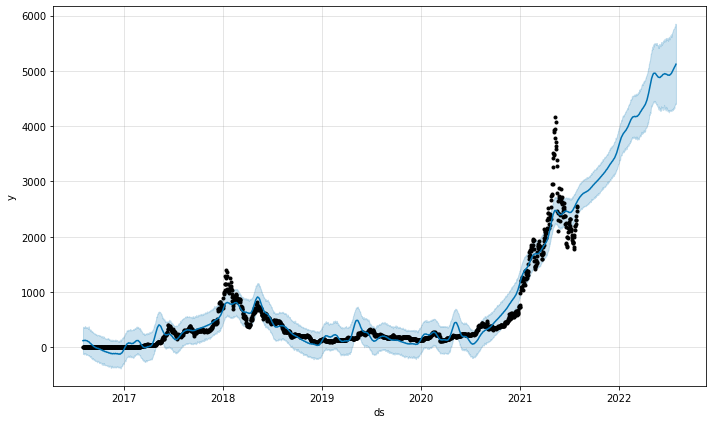

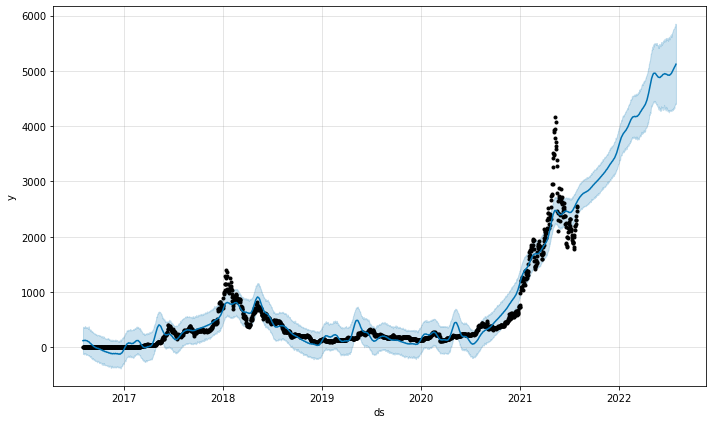

In [12]:
model.plot(forecast)

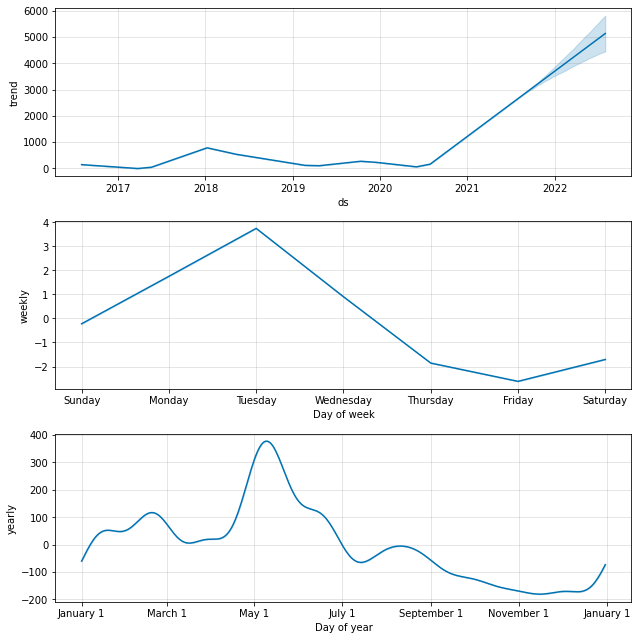

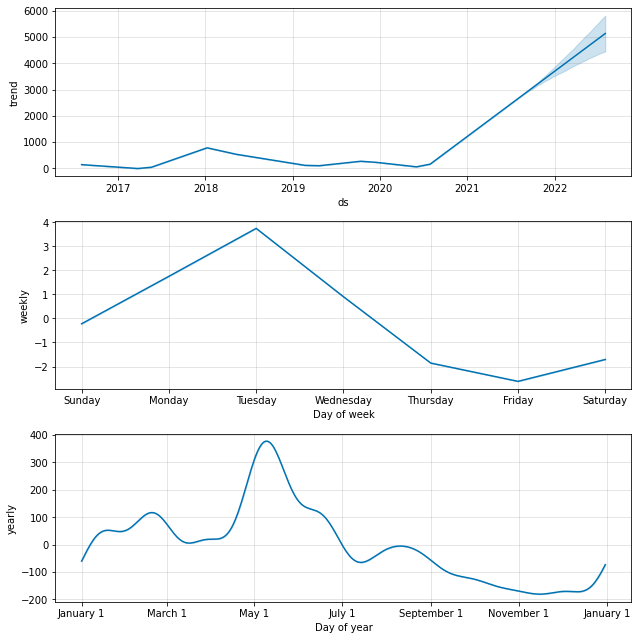

In [13]:
model.plot_components(forecast)